# Installing requirements

`pip install -r requirements.txt`

# Import and connections

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import roc_auc_score, roc_curve


2026-01-08 13:50:12.890068: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-08 13:50:12.892746: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-08 13:50:12.900755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-08 13:50:12.916420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-08 13:50:12.916448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-08 13:50:12.927430: I tensorflow/core/platform/cpu_feature_guard.cc:

# Data load

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.
Classes: ['horses', 'humans']


2026-01-08 13:50:14.696738: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2026-01-08 13:50:14.753974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


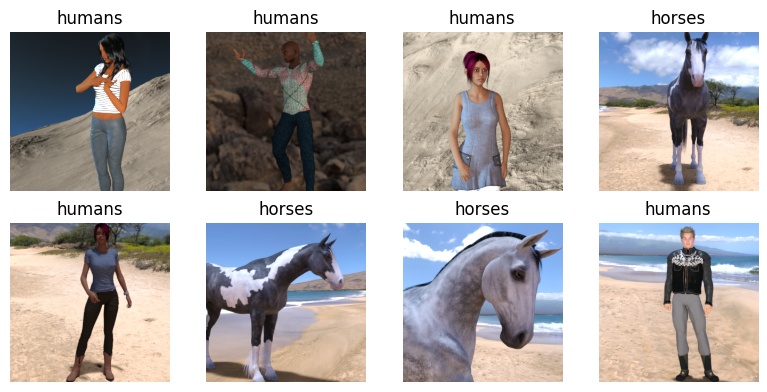

In [3]:
path_train = "~/datasets/horse-or-human/horse-or-human/train"
path_validation = "~/datasets/horse-or-human/horse-or-human/validation"

train_dir = os.path.expanduser(path_train)
val_dir = os.path.expanduser(path_validation)

BATCH_SIZE = 32
IMG_SIZE = (160, 160)
SEED = 42

autotune = tf.data.AUTOTUNE

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

class_names = train_ds.class_names
print('Classes:', class_names)

# небольшое ускорение пайплайна
train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

# визуализация нескольких примеров
plt.figure(figsize=(8, 4))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
plt.tight_layout()
plt.show()


# Augmentation

2026-01-08 13:50:15.053992: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2026-01-08 13:50:15.057455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


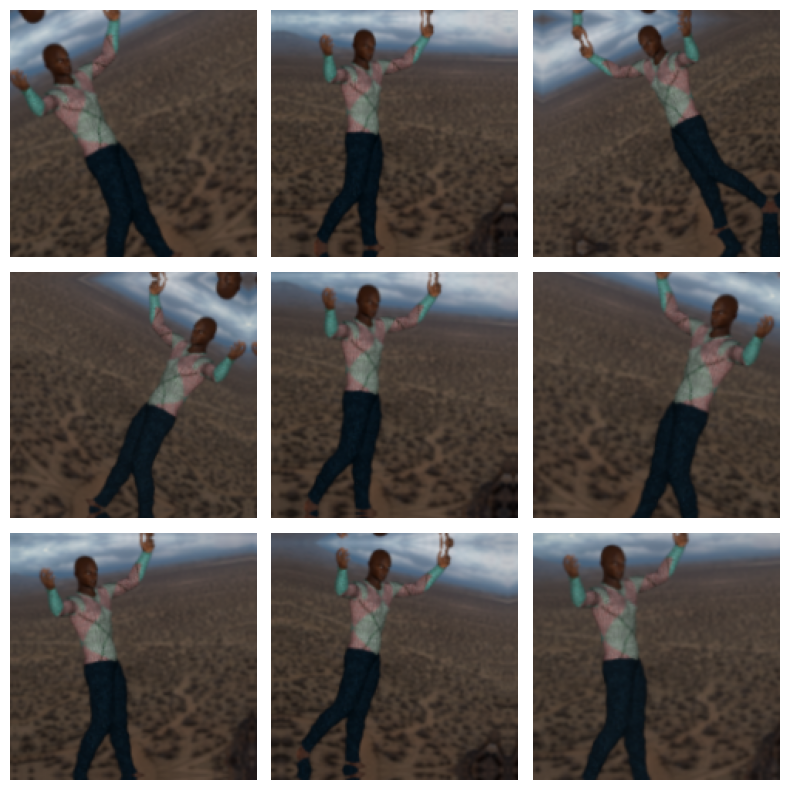

In [4]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.08),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ],
    name='data_augmentation',
)

# покажем аугментации на одном изображении
for images, labels in train_ds.take(1):
    sample = images[0:1]

plt.figure(figsize=(8, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    aug_img = data_augmentation(sample, training=True)[0].numpy().astype('uint8')
    plt.imshow(aug_img)
    plt.axis('off')
plt.tight_layout()
plt.show()


# Train models

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - acc: 0.7030 - loss: 0.6091 - val_acc: 0.6484 - val_loss: 1.6235
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - acc: 0.8861 - loss: 0.2741 - val_acc: 0.8047 - val_loss: 1.3751
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 388ms/step - acc: 0.9367 - loss: 0.1601 - val_acc: 0.8242 - val_loss: 1.1947
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 389ms/step - acc: 0.9279 - loss: 0.1798 - val_acc: 0.8203 - val_loss: 0.7709
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - acc: 0.9503 - loss: 0.1233 - val_acc: 0.8281 - val_loss: 1.6428
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - acc: 0.9679 - loss: 0.0884 - val_acc: 0.7773 - val_loss: 2.3898
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/step - acc: 0.9757 - loss: 0.0732 - val_acc: 0.8516 - val_loss: 1.3823
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - acc: 0.9776 - loss: 0.0582 - val_acc: 0.7500 - val_loss: 2.9256
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 400ms/

2026-01-08 13:52:28.614170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


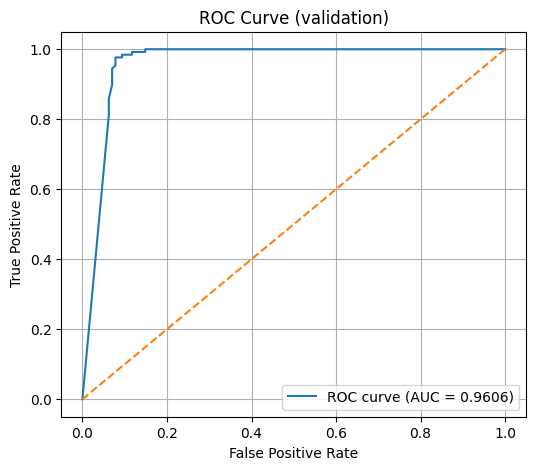

In [5]:
# Простая CNN
inputs = keras.Input(shape=(*IMG_SIZE, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = data_augmentation(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name='acc')],
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

# ROC-AUC на validation
y_true = []
y_score = []
for batch_images, batch_labels in val_ds:
    preds = model.predict(batch_images, verbose=0).reshape(-1)
    y_true.extend(batch_labels.numpy().reshape(-1).tolist())
    y_score.extend(preds.tolist())

y_true = np.array(y_true)
y_score = np.array(y_score)

roc_auc = roc_auc_score(y_true, y_score)
print('ROC-AUC:', roc_auc)

fpr, tpr, _ = roc_curve(y_true, y_score)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (validation)')
plt.legend()
plt.grid(True)
plt.show()


2026-01-08 13:52:29.118686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


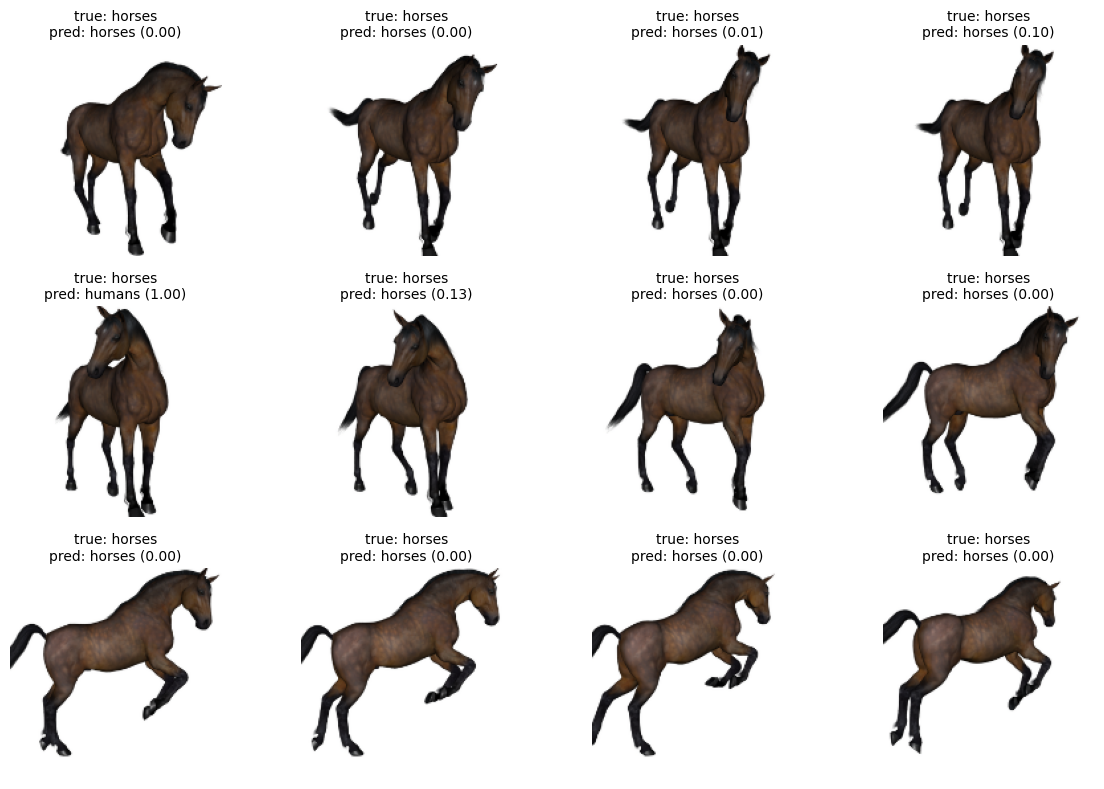

In [6]:
# Примеры предсказаний на validation
n_show = 12

plt.figure(figsize=(12, 8))
for batch_images, batch_labels in val_ds.take(1):
    probs = model.predict(batch_images, verbose=0).reshape(-1)
    pred_labels = (probs >= 0.5).astype(int)

    for i in range(min(n_show, len(batch_images))):
        ax = plt.subplot(3, 4, i + 1)
        img = batch_images[i].numpy().astype('uint8')
        true_idx = int(batch_labels[i].numpy())
        pred_idx = int(pred_labels[i])
        plt.imshow(img)
        plt.title(
            f"true: {class_names[true_idx]}\n"
            f"pred: {class_names[pred_idx]} ({probs[i]:.2f})",
            fontsize=10,
        )
        plt.axis('off')

plt.tight_layout()
plt.show()
